# Imports

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Utils

In [186]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

def sigmoid(X):
   return 1/(1+np.exp(-X))

def sigmoid_prime(X):
   return sigmoid(X)*(1 - sigmoid(X))

def last(X):
    return X

def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

# Layers

In [187]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [188]:
class FullyConnectedLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        delta = np.dot(output_error, self.weights.T)
        delta_weight = learning_rate * np.dot(self.input.T, output_error)
        self.weights -= delta_weight
        self.bias -= learning_rate * output_error
        return delta

In [189]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

# Network

In [190]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def set_loss(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        samples = len(input_data)
        result = []

        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    def train(self, x_train, y_train, x_test, y_test, epochs, learning_rate):
        errors_test = []
        errors_train = []
        samples = len(x_train)

        for i in tqdm(range(epochs)):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                err += self.loss(y_train[j], output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            test_err = self.loss(y_test[i], self.predict([x_test[i]]))
            errors_test.append((i+1, test_err))
            err /= samples
            errors_train.append((i+1, err))
        return zip(errors_test, errors_train)

# Train

Create network

In [191]:
net = Network()
net.add(FullyConnectedLayer(1, 20))
net.add(ActivationLayer(ReLU, dReLU))
net.add(FullyConnectedLayer(20, 30))
net.add(ActivationLayer(ReLU, dReLU))
net.add(FullyConnectedLayer(30, 1))
net.set_loss(mse, mse_prime)

Create train set:

In [192]:
l = np.linspace(-2*3.14, 2*3.14, 1000)
x_train = [l[i] for i in range(len(l)) if i % 2 == 1]
x_test = [l[i] for i in range(len(l)) if i % 2 == 0]

y_train = np.array([np.sin(x) for x in x_train])
y_test = np.array([np.sin(x) for x in x_test])

Train and plot error

100%|██████████| 400/400 [00:28<00:00, 13.95it/s]


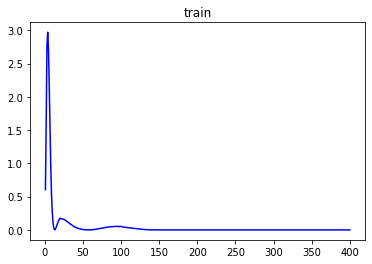

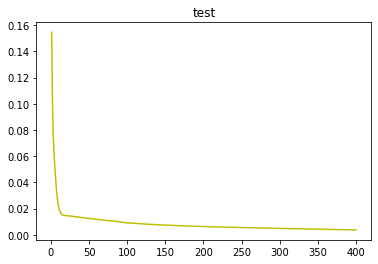

In [193]:
# print("Before:")
# print(net.layers[2].weights)
train_data = net.train(x_train, y_train, x_test, y_test, epochs=400, learning_rate=0.001)
# print("After:")
# print(net.layers[2].weights)
train, test = zip(*train_data)

epochs, errors = zip(*train)
plt.plot(epochs, errors, 'b')
plt.title("train")
plt.show()

epochs, errors = zip(*test)
plt.plot(epochs, errors, 'y')
plt.title("test")
plt.show()

Plot training result:

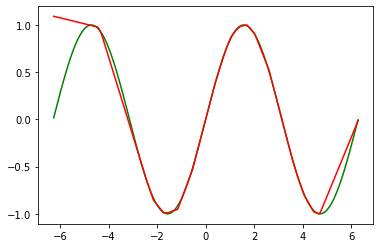

In [194]:
y_train_predicted = []
for x in x_train:
  y_train_predicted.append(net.predict([x])[0][0][0])

plt.plot(x_train, y_train, 'g')
plt.plot(x_train, y_train_predicted, 'r')
plt.show()

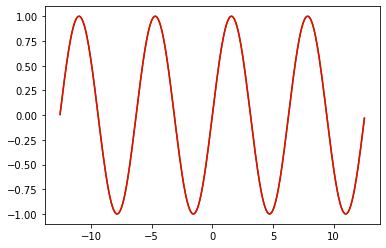

In [195]:
l = np.linspace(-4*3.14, 4*3.14, 1000)
x_test = [l[i] for i in range(len(l)) if i % 2 == 0]
y_test = np.array([np.sin(x) for x in x_test])

y_test_predicted = []
for x in x_test:
  y_test_predicted.append(net.predict([x])[0][0][0])

plt.plot(x_test, y_test, 'g')
plt.plot(x_test, y_test, 'r')
plt.show()